
# Lab #4

First and Last Name: Muhammad Waseem

Student ID: 501038529

In [ ]:
import math
import numpy as np

def lab4Function(x):
  return 0.2*math.pow(x,4) + 2*math.pow(x,3)  + 0.1*math.pow(x,2) + 10

def get_dataset(argument=""):
  samples = []
  for x in np.linspace(-1,1,30000):
    samples.append((x,lab4Function(x)))
  if argument == "shuffle":
    np.random.shuffle(samples)
  return samples

In [ ]:
def spltData(train,validation,test, data):
  trainIdx = int((train/100)*len(data))
  validIdx = int((validation/100)*len(data))
  testIdx = int((test/100)*len(data))
  return data[:trainIdx], data[trainIdx:trainIdx+validIdx], data[trainIdx+validIdx:]

In [ ]:
def scaleData(data):
  newData = []
  for x in (data):
    xNew = (x - min(data)) / (max(data) - min(data))
    newData.append(xNew)
  return newData

In [ ]:
def MAE(expected,actual):
  sum = 0
  for idx,expP in enumerate(expected):
    sum+=abs(expP-actual[idx])
  return sum/len(expected)

def MSE(expected,actual):
  sum = 0
  for idx,expP in enumerate(expected):
    sum+=pow((expP-actual[idx]),2)
  return sum/len(expected)

def RMSE(expected,actual):
  return math.sqrt(MSE(expected,actual))

def rTwoScore(expected,actual):
  mean = 0
  for value in actual:
    mean += value
  mean = mean/len(actual)

  ssr = 0
  for idx,nExpected in enumerate(expected):
    ssr += (nExpected-actual[idx]) ** 2

  sst = 0
  for idx,unused in enumerate(actual):
      sst += (actual[idx]-mean) ** 2
  return (1 - (ssr/sst))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 44.9316 - val_loss: 0.2319
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1643 - val_loss: 0.0717
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0612 - val_loss: 0.0475
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0480 - val_loss: 0.0411
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0378 - val_loss: 0.0304
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0260 - val_loss: 0.0166
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0112 - val_loss: 0.0046
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0012 - val_loss: 7.3956e-04
Epoch 12/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms

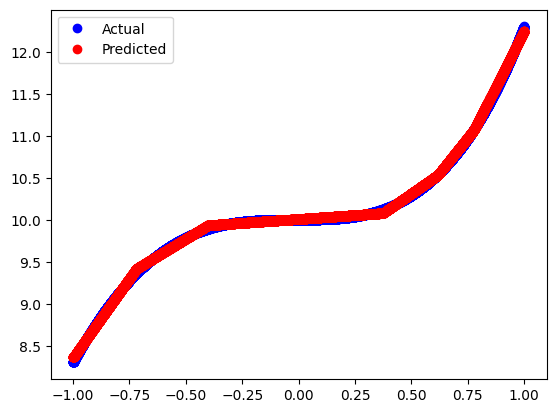

MAE: 0.018706113860791757
MSE: 0.0004882920351093716
RMSE: 0.022097330949899165
R2: 0.9991791457657958


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

trainData, validData, testData = spltData(30,20,50,get_dataset(argument="shuffle"))
xTest = np.array([pt[0] for pt in testData])
yTest = np.array([pt[1] for pt in testData])
xTrain = np.array([pt[0] for pt in trainData])
yTrain = np.array([pt[1] for pt in trainData])
xValid = np.array([pt[0] for pt in validData])
yValid = np.array([pt[1] for pt in validData])

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(xTrain, yTrain, validation_data=(xValid, yValid), batch_size=12, epochs=20)
yTestPredicted = model.predict(xTest)

fig, ax = plt.subplots()
ax.plot(xTest, yTest,'bo', label='Actual')
ax.plot(xTest, yTestPredicted,'ro', label='Predicted')
ax.legend()
plt.show()

yTestPredictedFix = yTestPredicted.flatten()
print(f"MAE: {MAE(yTest,yTestPredictedFix)}")
print(f"MSE: {MSE(yTest,yTestPredictedFix)}")
print(f"RMSE: {RMSE(yTest,yTestPredictedFix)}")
print(f"R2: {rTwoScore(yTest,yTestPredictedFix)}")

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 77.6701 - val_loss: 1.2295
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3784 - val_loss: 0.0891
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0807 - val_loss: 0.0618
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0554 - val_loss: 0.0420
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0388 - val_loss: 0.0332
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0301 - val_loss: 0.0245
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0204 - val_loss: 0.0136
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0113 - val_loss: 0.0071
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0054 - val_loss: 0.0039
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 12/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

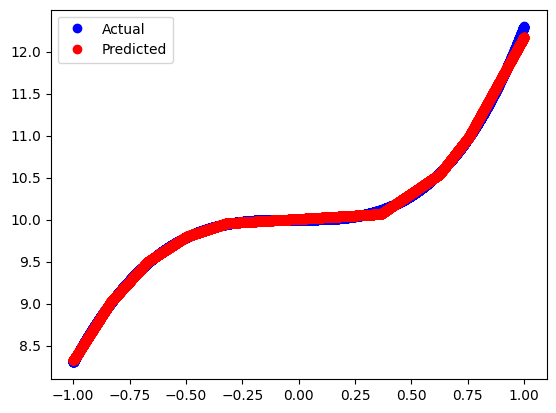

MAE: 0.01453461994307605
MSE: 0.00043260119766157007
RMSE: 0.020799067230565176
R2: 0.9992488630343436


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

trainData, validData, testData = spltData(30,20,50,get_dataset(argument="shuffle"))
xTest = np.array([pt[0] for pt in testData])
yTest = np.array([pt[1] for pt in testData])
xTrain = np.array([pt[0] for pt in trainData])
yTrain = np.array([pt[1] for pt in trainData])
xValid = np.array([pt[0] for pt in validData])
yValid = np.array([pt[1] for pt in validData])

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(xTrain, yTrain, validation_data=(xValid, yValid), batch_size=12, epochs=20)
yTestPredicted = model.predict(xTest)

fig, ax = plt.subplots()
ax.plot(xTest, yTest,'bo', label='Actual')
ax.plot(xTest, yTestPredicted,'ro', label='Predicted')
ax.legend()
plt.show()

yTestPredictedFix = yTestPredicted.flatten()
print(f"MAE: {MAE(yTest,yTestPredictedFix)}")
print(f"MSE: {MSE(yTest,yTestPredictedFix)}")
print(f"RMSE: {RMSE(yTest,yTestPredictedFix)}")
print(f"R2: {rTwoScore(yTest,yTestPredictedFix)}")

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 69.3103 - val_loss: 24.0386
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 18.1881 - val_loss: 6.0143
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.3285 - val_loss: 1.2606
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9637 - val_loss: 0.6102
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5844 - val_loss: 0.5827
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5411 - val_loss: 0.2875
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2604 - val_loss: 0.1896
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1904 - val_loss: 0.1541
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1546 - val_loss: 0.1343
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1327 - val_loss: 0.1115
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0972 - val_loss: 0.0272
Epoch 12/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/s

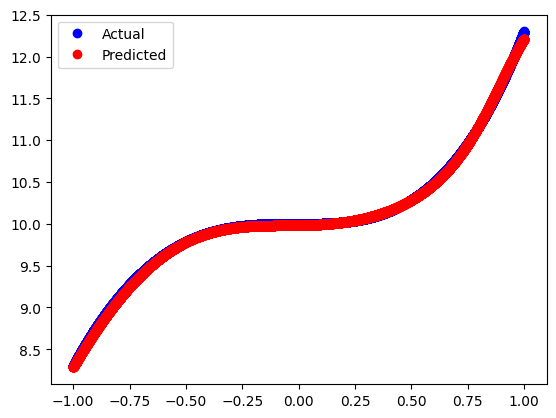

MAE: 0.01654353015421609
MSE: 0.0004130958860814333
RMSE: 0.02032476041879543
R2: 0.9993020717234969


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

trainData, validData, testData = spltData(30,20,50,get_dataset(argument="shuffle"))
xTest = np.array([pt[0] for pt in testData])
yTest = np.array([pt[1] for pt in testData])
xTrain = np.array([pt[0] for pt in trainData])
yTrain = np.array([pt[1] for pt in trainData])
xValid = np.array([pt[0] for pt in validData])
yValid = np.array([pt[1] for pt in validData])

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(12, activation='tanh'))
model.add(tf.keras.layers.Dense(8, activation='tanh'))
model.add(tf.keras.layers.Dense(4, activation='tanh'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(xTrain, yTrain, validation_data=(xValid, yValid), batch_size=12, epochs=20)
yTestPredicted = model.predict(xTest)

fig, ax = plt.subplots()
ax.plot(xTest, yTest,'bo', label='Actual')
ax.plot(xTest, yTestPredicted,'ro', label='Predicted')
ax.legend()
plt.show()

yTestPredictedFix = yTestPredicted.flatten()
print(f"MAE: {MAE(yTest,yTestPredictedFix)}")
print(f"MSE: {MSE(yTest,yTestPredictedFix)}")
print(f"RMSE: {RMSE(yTest,yTestPredictedFix)}")
print(f"R2: {rTwoScore(yTest,yTestPredictedFix)}")

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0373 - val_loss: 0.0061
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0058 - val_loss: 0.0043
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0012 - val_loss: 4.7384e-04
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.5698e-04 - val_loss: 4.1622e-04
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.3331e-04 - val_loss: 2.7452e-04
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8739e-04 - val_loss: 3.0601e-04
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2319e-04 - val_loss: 2.7027e-04
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8206e-04 - val_loss: 3.2828e-04
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0031e-04 - val_loss: 2.4695e-04
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.7890e-04 - val_loss: 3.1

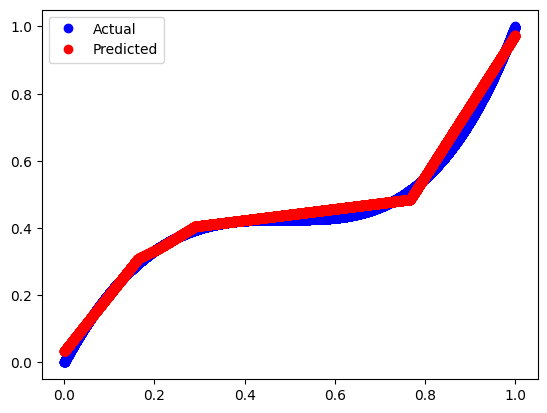

MAE: 0.014564845903685153
MSE: 0.00038245396391926954
RMSE: 0.019556430244788273
R2: 0.9898809524597545


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

trainData, validData, testData = spltData(30,20,50,get_dataset(argument="shuffle"))
xTest = np.array(scaleData([pt[0] for pt in testData]))
yTest = np.array(scaleData([pt[1] for pt in testData]))
xTrain = np.array(scaleData([pt[0] for pt in trainData]))
yTrain = np.array(scaleData([pt[1] for pt in trainData]))
xValid = np.array(scaleData([pt[0] for pt in validData]))
yValid = np.array(scaleData([pt[1] for pt in validData]))

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(xTrain, yTrain, validation_data=(xValid, yValid), batch_size=12, epochs=20)
yTestPredicted = model.predict(xTest)

fig, ax = plt.subplots()
ax.plot(xTest, yTest,'bo', label='Actual')
ax.plot(xTest, yTestPredicted,'ro', label='Predicted')
ax.legend()
plt.show()

yTestPredictedFix = yTestPredicted.flatten()
print(f"MAE: {MAE(yTest,yTestPredictedFix)}")
print(f"MSE: {MSE(yTest,yTestPredictedFix)}")
print(f"RMSE: {RMSE(yTest,yTestPredictedFix)}")
print(f"R2: {rTwoScore(yTest,yTestPredictedFix)}")


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0349 - val_loss: 0.0073
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0069 - val_loss: 0.0072
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0063 - val_loss: 0.0057
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0054 - val_loss: 0.0036
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0026 - val_loss: 3.1171e-04
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1853e-04 - val_loss: 2.8930e-04
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9065e-04 - val_loss: 2.4909e-04
Epoch 12/20
750/750 ━━━━━━━━━━━━

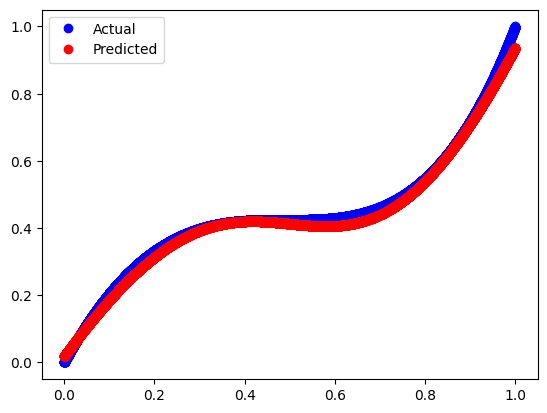

MAE: 0.015349121574836241
MSE: 0.0003369363013017428
RMSE: 0.01835582472409624
R2: 0.9903259399332024


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

trainData, validData, testData = spltData(30,20,50,get_dataset(argument="shuffle"))
xTest = np.array(scaleData([pt[0] for pt in testData]))
yTest = np.array(scaleData([pt[1] for pt in testData]))
xTrain = np.array(scaleData([pt[0] for pt in trainData]))
yTrain = np.array(scaleData([pt[1] for pt in trainData]))
xValid = np.array(scaleData([pt[0] for pt in validData]))
yValid = np.array(scaleData([pt[1] for pt in validData]))

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(12, activation='tanh'))
model.add(tf.keras.layers.Dense(8, activation='tanh'))
model.add(tf.keras.layers.Dense(4, activation='tanh'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(xTrain, yTrain, validation_data=(xValid, yValid), batch_size=12, epochs=20)
yTestPredicted = model.predict(xTest)

fig, ax = plt.subplots()
ax.plot(xTest, yTest,'bo', label='Actual')
ax.plot(xTest, yTestPredicted,'ro', label='Predicted')
ax.legend()
plt.show()

yTestPredictedFix = yTestPredicted.flatten()
print(f"MAE: {MAE(yTest,yTestPredictedFix)}")
print(f"MSE: {MSE(yTest,yTestPredictedFix)}")
print(f"RMSE: {RMSE(yTest,yTestPredictedFix)}")
print(f"R2: {rTwoScore(yTest,yTestPredictedFix)}")

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1143 - val_loss: 0.0241
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.2805e-04 - val_loss: 0.0212
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.5412e-05 - val_loss: 0.0209
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9836e-05 - val_loss: 0.0211
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5860e-05 - val_loss: 0.0209
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3277e-05 - val_loss: 0.0209
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1995e-05 - val_loss: 0.0205
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1647e-05 - val_loss: 0.0209
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0743e-05 - val_loss: 0.0203
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1598e-05 - val_loss: 0.0212
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0148e-05 - val_loss: 0.0206
Epoch 12/20


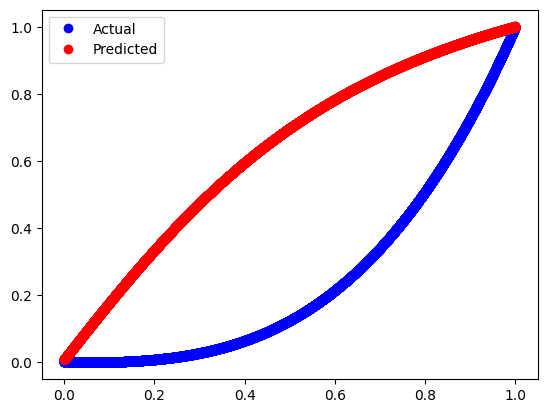

MAE: 0.3815789170077425
MSE: 0.1753388984898549
RMSE: 0.41873487852083074
R2: -1.1229893759537153


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

trainData, validData, testData = spltData(30,20,50,get_dataset())
xTest = np.array(scaleData([pt[0] for pt in testData]))
yTest = np.array(scaleData([pt[1] for pt in testData]))
xTrain = np.array(scaleData([pt[0] for pt in trainData]))
yTrain = np.array(scaleData([pt[1] for pt in trainData]))
xValid = np.array(scaleData([pt[0] for pt in validData]))
yValid = np.array(scaleData([pt[1] for pt in validData]))

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(12, activation='tanh'))
model.add(tf.keras.layers.Dense(8, activation='tanh'))
model.add(tf.keras.layers.Dense(4, activation='tanh'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(xTrain, yTrain, validation_data=(xValid, yValid), batch_size=12, epochs=20)
yTestPredicted = model.predict(xTest)

fig, ax = plt.subplots()
ax.plot(xTest, yTest,'bo', label='Actual')
ax.plot(xTest, yTestPredicted,'ro', label='Predicted')
ax.legend()
plt.show()

yTestPredictedFix = yTestPredicted.flatten()
print(f"MAE: {MAE(yTest,yTestPredictedFix)}")
print(f"MSE: {MSE(yTest,yTestPredictedFix)}")
print(f"RMSE: {RMSE(yTest,yTestPredictedFix)}")
print(f"R2: {rTwoScore(yTest,yTestPredictedFix)}")


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1238 - val_loss: 0.0261
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0012 - val_loss: 0.0243
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.4455e-04 - val_loss: 0.0206
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.1786e-05 - val_loss: 0.0214
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.3575e-05 - val_loss: 0.0210
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.1651e-05 - val_loss: 0.0205
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.6810e-05 - val_loss: 0.0205
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3707e-05 - val_loss: 0.0210
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2040e-05 - val_loss: 0.0199
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1605e-05 - val_loss: 0.0207
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1944e-05 - val_loss: 0.0206
Epoch 12/20
750/

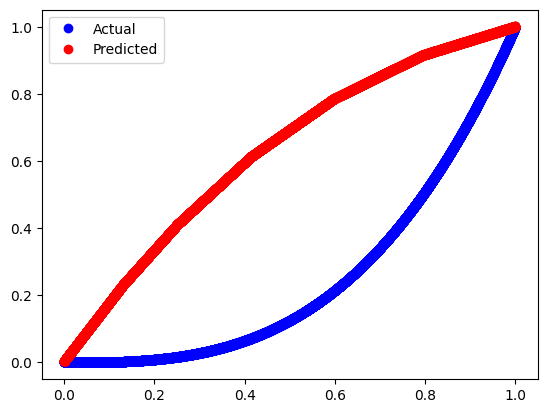

MAE: 0.3813903986861663
MSE: 0.17522045589154664
RMSE: 0.41859342552355816
R2: -1.1124267906476377


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Unshuffled Model with ReLU Activation and Scaled Data
trainData, validData, testData = spltData(30,20,50,get_dataset())
xTest = np.array(scaleData([pt[0] for pt in testData]))
yTest = np.array(scaleData([pt[1] for pt in testData]))
xTrain = np.array(scaleData([pt[0] for pt in trainData]))
yTrain = np.array(scaleData([pt[1] for pt in trainData]))
xValid = np.array(scaleData([pt[0] for pt in validData]))
yValid = np.array(scaleData([pt[1] for pt in validData]))

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(xTrain, yTrain, validation_data=(xValid, yValid), batch_size=12, epochs=20)
yTestPredicted = model.predict(xTest)

fig, ax = plt.subplots()
ax.plot(xTest, yTest, 'bo', label='Actual')
ax.plot(xTest, yTestPredicted, 'ro', label='Predicted')
ax.legend()
plt.show()

yTestPredictedFix = yTestPredicted.flatten()
print(f"MAE: {MAE(yTest, yTestPredictedFix)}")
print(f"MSE: {MSE(yTest, yTestPredictedFix)}")
print(f"RMSE: {RMSE(yTest, yTestPredictedFix)}")
print(f"R2: {rTwoScore(yTest, yTestPredictedFix)}")


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 50.7343 - val_loss: 15.4509
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.0758 - val_loss: 3.2114
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9083 - val_loss: 0.8260
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2382 - val_loss: 0.5040
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2135 - val_loss: 0.4818
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2163 - val_loss: 0.4607
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2117 - val_loss: 0.4587
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2134 - val_loss: 0.4600
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2112 - val_loss: 0.4434
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2163 - val_loss: 0.4163
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1329 - val_loss: 0.0126
Epoch 12/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/st

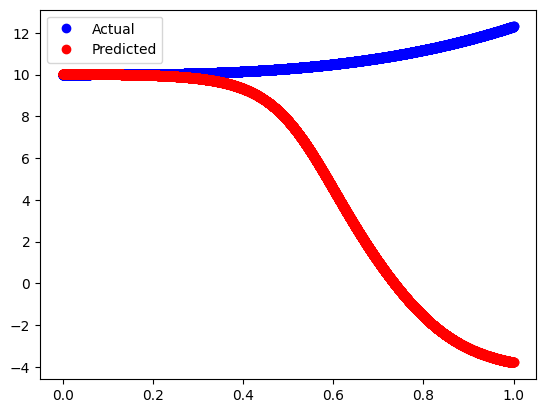

MAE: 5.484129503096848
MSE: 64.47274634647259
RMSE: 8.029492284476808
R2: -1.347790429264108


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Unshuffled Model with Tanh Activation
trainData, validData, testData = spltData(30,20,50,get_dataset())
xTest = np.array([pt[0] for pt in testData])
yTest = np.array([pt[1] for pt in testData])
xTrain = np.array([pt[0] for pt in trainData])
yTrain = np.array([pt[1] for pt in trainData])
xValid = np.array([pt[0] for pt in validData])
yValid = np.array([pt[1] for pt in validData])

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(12, activation='tanh'))
model.add(tf.keras.layers.Dense(8, activation='tanh'))
model.add(tf.keras.layers.Dense(4, activation='tanh'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(xTrain, yTrain, validation_data=(xValid, yValid), batch_size=12, epochs=20)
yTestPredicted = model.predict(xTest)

fig, ax = plt.subplots()
ax.plot(xTest, yTest, 'bo', label='Actual')
ax.plot(xTest, yTestPredicted, 'ro', label='Predicted')
ax.legend()
plt.show()

yTestPredictedFix = yTestPredicted.flatten()
print(f"MAE: {MAE(yTest, yTestPredictedFix)}")
print(f"MSE: {MSE(yTest, yTestPredictedFix)}")
print(f"RMSE: {RMSE(yTest, yTestPredictedFix)}")
print(f"R2: {rTwoScore(yTest, yTestPredictedFix)}")


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 58.8996 - val_loss: 15.0082
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0482 - val_loss: 11.3245
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5993 - val_loss: 8.0670
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0896 - val_loss: 4.1416
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5219 - val_loss: 1.4197
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1259 - val_loss: 0.3320
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0166 - val_loss: 0.1722
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0072 - val_loss: 0.2249
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0048 - val_loss: 0.2041
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0027 - val_loss: 0.1623
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0018 - val_loss: 0.1311
Epoch 12/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/s

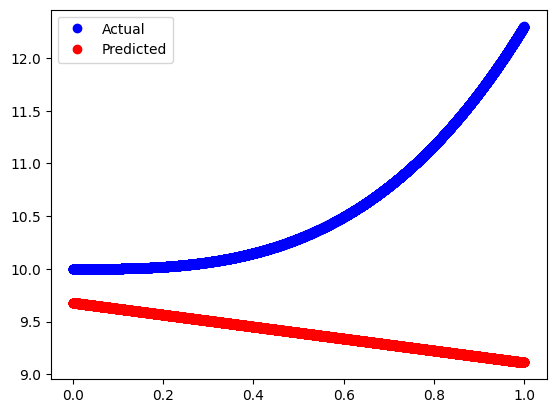

MAE: 1.1779773184072253
MSE: 2.030521328908078
RMSE: 1.4249636237139802
R2: -74.92501536769699


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Unshuffled Model with Single Layer and ReLU Activation (Fixed)
trainData, validData, testData = spltData(30,20,50,get_dataset())
xTest = np.array([pt[0] for pt in testData])
yTest = np.array([pt[1] for pt in testData])
xTrain = np.array([pt[0] for pt in trainData])
yTrain = np.array([pt[1] for pt in trainData])
xValid = np.array([pt[0] for pt in validData])
yValid = np.array([pt[1] for pt in validData])

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(xTrain, yTrain, validation_data=(xValid, yValid), batch_size=12, epochs=20)
yTestPredicted = model.predict(xTest)

fig, ax = plt.subplots()
ax.plot(xTest, yTest, 'bo', label='Actual')
ax.plot(xTest, yTestPredicted, 'ro', label='Predicted')
ax.legend()
plt.show()

yTestPredictedFix = yTestPredicted.flatten()
print(f"MAE: {MAE(yTest, yTestPredictedFix)}")
print(f"MSE: {MSE(yTest, yTestPredictedFix)}")
print(f"RMSE: {RMSE(yTest, yTestPredictedFix)}")
print(f"R2: {rTwoScore(yTest, yTestPredictedFix)}")


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 49.4525 - val_loss: 11.4650
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5968 - val_loss: 5.7786
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8789 - val_loss: 0.8492
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0482 - val_loss: 0.2034
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0019 - val_loss: 0.1468
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.6507e-04 - val_loss: 0.1435
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9618e-04 - val_loss: 0.1365
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.5942e-04 - val_loss: 0.1302
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2667e-04 - val_loss: 0.1251
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.2840e-04 - val_loss: 0.1234
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.3936e-04 - val_loss: 0.1079
Epoch 12/20
750/750 ━━━━━━

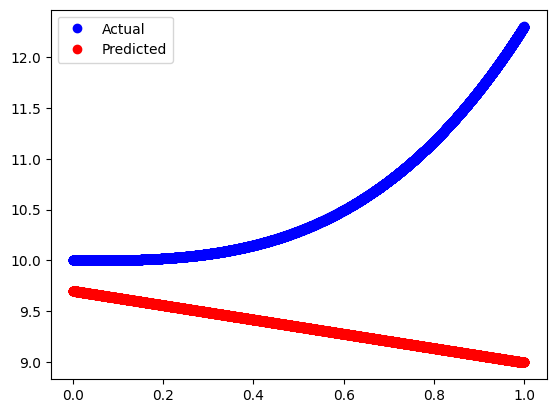

MAE: 1.2246848828247483
MSE: 2.2043773451379747
RMSE: 1.4847145668908803
R2: -4.228249424991922


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as rTwoScore

def RMSE(y_true, y_pred):
    return np.sqrt(MSE(y_true, y_pred))

# Data Extraction
trainData, validData, testData = spltData(30,20,50,get_dataset())
xTest = np.array([pt[0] for pt in testData])
yTest = np.array([pt[1] for pt in testData])
xTrain = np.array([pt[0] for pt in trainData])
yTrain = np.array([pt[1] for pt in trainData])
xValid = np.array([pt[0] for pt in validData])
yValid = np.array([pt[1] for pt in validData])

# Model Creation
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

# Model Training
model.fit(xTrain, yTrain, validation_data=(xValid, yValid), batch_size=12, epochs=20)
model.output_shape

# Model Prediction
yTestPredicted = model.predict(xTest)
yTestPredictedFix = yTestPredicted.flatten()

# Plot Results
fig, ax = plt.subplots()
ax.plot(xTest, yTest, 'bo', label='Actual')
ax.plot(xTest, yTestPredictedFix, 'ro', label='Predicted')
ax.legend()
plt.show()

# Metrics Calculation
print(f"MAE: {MAE(yTest, yTestPredictedFix)}")
print(f"MSE: {MSE(yTest, yTestPredictedFix)}")
print(f"RMSE: {RMSE(yTest, yTestPredictedFix)}")
print(f"R2: {rTwoScore(yTest, yTestPredictedFix)}")


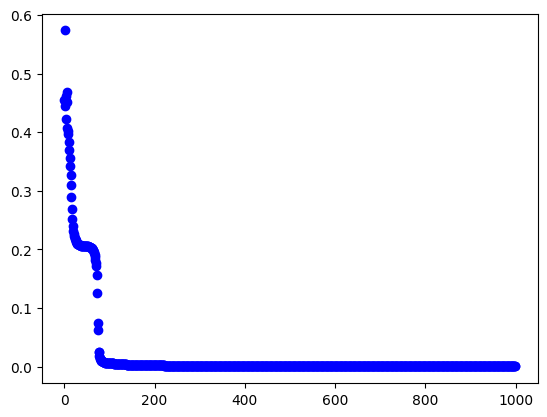

[0, 0]  0
[0, 1]  1
[1, 0]  1
[1, 1]  0


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


def makeInitWeightsBias(inSize,outSize):
  weight = np.random.rand(inSize,outSize)
  bias = np.random.rand(1,outSize)
  return weight,bias

class layer:
  def __init__(self,weight,bias):
    self.weight = weight
    self.bias = bias
  def forwardProp(self,input):
    self.latestInput = input
    self.latestOutput = np.dot(input,self.weight)+ self.bias
    return np.tanh(self.latestOutput)
  def backProp(self,inputError,alpha):
    tanHOut = (1-np.tanh(self.latestOutput)**2) * inputError
    err1 = np.dot(tanHOut,self.weight.T)
    self.weight -= alpha * np.dot(self.latestInput.T, tanHOut)
    self.bias -= self.bias * tanHOut
    return err1

inputs = [[0,0],[0,1],[1,0],[1,1]]
realOutput = [[0],[1],[1],[0]]

layers = [
  layer(*makeInitWeightsBias(2,3)),
  layer(*makeInitWeightsBias(3,3)),
  layer(*makeInitWeightsBias(3,1))
    ]

graphPlsX = []
graphPlsY = []
for i in range(0,1000):
  err = 0
  for trainIdx,trainIn in enumerate(inputs):
    nxtOut = np.array([trainIn])
    for layer in layers:
      nxtOut = layer.forwardProp(nxtOut)
    err += np.mean(np.power(realOutput[trainIdx]-nxtOut, 2))
    diffIn = 2*(nxtOut-realOutput[trainIdx])
    for layer in reversed(layers):
      diffIn = layer.backProp(diffIn,0.5)
  graphPlsX.append(i)
  graphPlsY.append(err/len(inputs))

plt.plot(graphPlsX,graphPlsY, 'bo')
plt.show()

for trainIdx,trainIn in enumerate(inputs):
  nxtOut = np.array([trainIn])
  for layer in layers:
    nxtOut = layer.forwardProp(nxtOut)
  print(f"{trainIn}  {round(nxtOut[0][0])}")
